# Resolviendo un problema de clasificación múltiple

In [1]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import reuters


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [3]:
train_data.shape

(8982,)

In [4]:
train_data[0][:10]


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [5]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
  # las primeras 3 palabras del word index son palabras reservadas
  print(word_index.get(_ - 3))


None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [6]:
train_labels[0]


3

In [7]:
# debemos volver la lista del dataset
# a tensores para que la red los pueda entender
def vectorize(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results


In [8]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)


In [9]:
from tensorflow.keras.utils import to_categorical


In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
model = models.Sequential()

model.add(
  layers.Dense(
    64,
    activation='relu',
    input_shape=(10000,)
  )
)
model.add(
  layers.Dense(
    64,
    activation='relu'
  )
)

"""
No usamos sigmoid porque la relacion binaria de 0 a 1 no me permitiria
realizar clasificacion multiple

en su lugar la funcion sigmoid, con una relacion de -1 a 1 nos permite
clasificar cada una de las posibles salidas sin importar la cantidad
en base a la relacion de ser y no ser una categoria
"""
model.add(
  layers.Dense(
    46,
    activation='softmax'
  )
)

In [13]:
model.compile(
  optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Entrenamiento del modelo de clasificación múltiple

In [15]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 19ms/step - loss: 2.5528 - accuracy: 0.5446 - val_loss: 1.6447 - val_accuracy: 0.6650
Epoch 2/9
16/16 [==============================] - 0s 9ms/step - loss: 1.3698 - accuracy: 0.7175 - val_loss: 1.2758 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 0s 9ms/step - loss: 1.0284 - accuracy: 0.7805 - val_loss: 1.1231 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 9ms/step - loss: 0.8167 - accuracy: 0.8275 - val_loss: 1.0385 - val_accuracy: 0.7810
Epoch 5/9
16/16 [==============================] - 0s 9ms/step - loss: 0.6544 - accuracy: 0.8621 - val_loss: 0.9701 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 9ms/step - loss: 0.5277 - accuracy: 0.8891 - val_loss: 0.9577 - val_accuracy: 0.7920
Epoch 7/9
16/16 [==============================] - 0s 9ms/step - loss: 0.4317 - accuracy: 0.9105 - val_loss: 0.9113 - val_accuracy: 0.8090
Epoch 8/9
16/16 [=========

In [16]:
import matplotlib.pyplot as plt

In [17]:
def showHistoryError(history):
  # print(history.history)
  loss_vals = history.history['loss']
  val_loss_vals = history.history['val_loss']

  fig = plt.figure(figsize=(10,10))
  epochs = range(1, len(loss_vals) + 1)
  plt.plot(epochs, loss_vals, 'o', label='training')
  plt.plot(epochs, val_loss_vals, '--', label='validation')
  plt.legend()
  plt.show()


In [18]:
def showHistoryAccuracy(history):
  # print(history.history)
  loss_vals = history.history['accuracy']
  val_loss_vals = history.history['val_accuracy']

  fig = plt.figure(figsize=(10, 10))
  epochs = range(1, len(loss_vals) + 1)
  plt.plot(epochs, loss_vals, 'o', label='training')
  plt.plot(epochs, val_loss_vals, '--', label='validation')
  plt.legend()
  plt.show()


Como pudimos ver con 30 epocas el accuracy llegaba cerca de un 70% aun asi en la grafica vimos quen su accuracy mas alto se acercaba cerca de la epoca 9 por lo cual si reducimos las epocas a nuevo obtenemos un accuracy de 79%

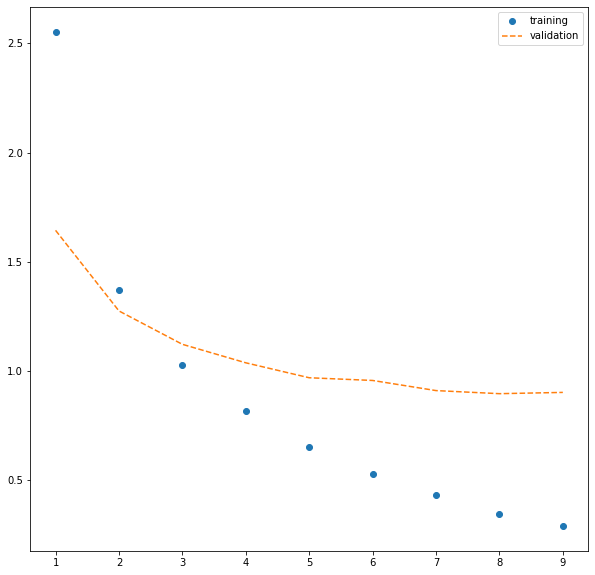

In [19]:
showHistoryError(history)

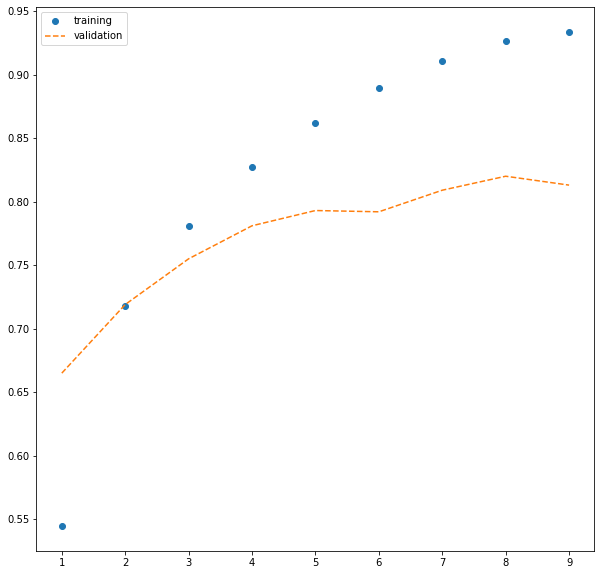

In [20]:
showHistoryAccuracy(history)


In [21]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0099 - accuracy: 0.7836


[1.0098659992218018, 0.7836152911186218]

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0]

array([2.9325721e-04, 7.1733819e-05, 8.6196742e-05, 8.0336392e-01,
       1.5271604e-01, 4.2457657e-05, 5.1191979e-05, 1.2974422e-04,
       4.5451308e-03, 1.4768472e-04, 7.9719568e-05, 5.6059803e-03,
       8.2440733e-04, 2.0697608e-03, 1.9151359e-04, 1.2053825e-04,
       2.7450477e-03, 3.7661329e-04, 6.9726509e-04, 6.7816554e-03,
       3.7108681e-03, 2.9846994e-04, 4.6626324e-04, 4.7027701e-04,
       1.4012283e-05, 1.2286351e-04, 6.1654900e-06, 1.2813578e-03,
       1.4719806e-04, 4.0688645e-04, 5.3342857e-04, 6.1631651e-04,
       1.3747808e-04, 3.7413723e-05, 5.3588778e-04, 2.5178527e-04,
       9.0954090e-03, 3.7547754e-04, 2.3605095e-05, 2.8218440e-04,
       3.5131096e-05, 1.7958786e-05, 2.5631985e-05, 1.5000984e-04,
       1.2857327e-05, 5.2515402e-06], dtype=float32)

In [24]:
np.sum(predictions[0])

1.0

In [25]:
# el valor predicho es el que posee el valor mas alto es decir
# el modelo aprendio que ese es el punto al que mas se acerca el valor
np.argmax(predictions[0])


3

## Reto

utilizar dropout, regularizacion, reduccion de la red y las practicas aprendidas para mejorar la red

In [29]:
from keras import regularizers


In [56]:
model = models.Sequential()

model.add(
    layers.Dense(
        64,
        activation='relu',
        input_shape=(10000,),
        kernel_regularizer=regularizers.l2(0.01)
    )
)

model.add(layers.Dropout(0.6))

model.add(
    layers.Dense(
        64,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.01)
    )
)

model.add(layers.Dropout(0.5))


"""
No usamos sigmoid porque la relacion binaria de 0 a 1 no me permitiria
realizar clasificacion multiple

en su lugar la funcion sigmoid, con una relacion de -1 a 1 nos permite
clasificar cada una de las posibles salidas sin importar la cantidad
en base a la relacion de ser y no ser una categoria
"""
model.add(
    layers.Dense(
        46,
        activation='softmax'
    )
)

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# entrenar el modelo
history = model.fit(partial_x_train, partial_y_train,
    epochs=14,
    batch_size=256,
    validation_data=(x_val, y_val)
)


Epoch 1/14
32/32 [==============================] - 1s 11ms/step - loss: 3.6277 - accuracy: 0.3423 - val_loss: 2.5483 - val_accuracy: 0.5510
Epoch 2/14
32/32 [==============================] - 0s 6ms/step - loss: 2.5398 - accuracy: 0.5074 - val_loss: 2.1548 - val_accuracy: 0.6120
Epoch 3/14
32/32 [==============================] - 0s 6ms/step - loss: 2.2288 - accuracy: 0.5763 - val_loss: 1.9702 - val_accuracy: 0.6500
Epoch 4/14
32/32 [==============================] - 0s 5ms/step - loss: 2.0538 - accuracy: 0.6075 - val_loss: 1.8327 - val_accuracy: 0.6790
Epoch 5/14
32/32 [==============================] - 0s 6ms/step - loss: 1.9236 - accuracy: 0.6324 - val_loss: 1.7537 - val_accuracy: 0.6890
Epoch 6/14
32/32 [==============================] - 0s 6ms/step - loss: 1.8380 - accuracy: 0.6502 - val_loss: 1.6827 - val_accuracy: 0.7020
Epoch 7/14
32/32 [==============================] - 0s 5ms/step - loss: 1.7706 - accuracy: 0.6659 - val_loss: 1.6215 - val_accuracy: 0.7040
Epoch 8/14
32/32 [=

32/32 [==============================] - 0s 5ms/step - loss: 1.4892 - accuracy: 0.7142 - val_loss: 1.4521 - val_accuracy: 0.7130

Epoch 13/13
32/32 [==============================] - 0s 5ms/step - loss: 1.4521 - accuracy: 0.7291 - val_loss: 1.4314 - val_accuracy: 0.7250

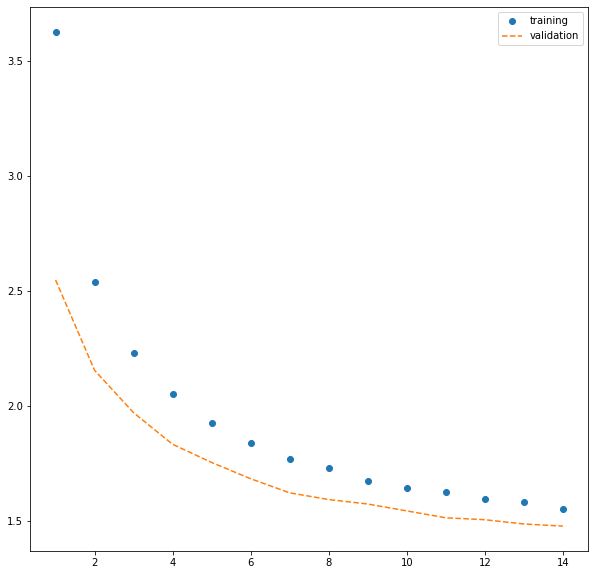

In [57]:
showHistoryError(history)

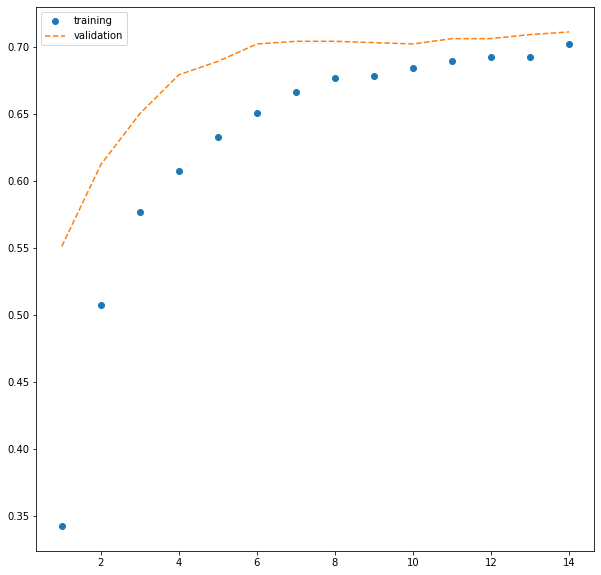

In [58]:
showHistoryAccuracy(history)
